In [1]:
import os
def notify(text, title, subtitle="", sound="Glass"):
    os.system("""
              osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "{}"'
              """.format(text, title, subtitle, sound))

In [2]:
from astropy.table import Table
SDSS=Table.read('/Users/justin/Astro/Yale18/sdss060718.fits')
#SDSS=SDSS[SDSS['z']>=0.5]
print(len(SDSS))
print(SDSS.info)


119365
<Table length=119365>
     name       dtype  n_bad
-------------- ------- -----
     specObjID bytes25     0
     bestObjID   int64     0
            ra float64     0
           dec float64     0
             z float32     0
          zErr float32     0
      zWarning   int32     0
sciencePrimary   int16     0
   programname bytes32     0
        survey bytes32     0
   pca_logmass float64 63543
  fsps_logmass float64 63543
             r float32  6559
  plateQuality bytes32     0



Text(0,0.5,'dec')

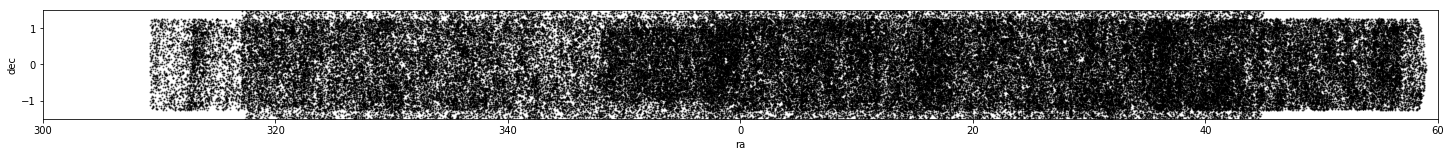

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
gra = np.array(SDSS['ra'])
#dra = d['ra']
gdec = np.array(SDSS['dec'])
#ddec = d['dec']
gra[gra > 180] -= 360
#dra[dra > 180] -= 360

# Plot the data
fig, ax = plt.subplots(figsize=(25,2))
ax.scatter(gra,gdec,1.,color='k',alpha=.5)
ax.axis([-60,60,-1.5,1.5])
#ax.scatter(dra,ddec,10)

# Set the ticks so that negative ticks represent >180 numbers
ticks = ax.get_xticks()
ticks[ticks < 0] += 360
ax.set_xticklabels([int(tick) for tick in ticks])
ax.set_xlabel('ra')
ax.set_ylabel('dec')

#ax.saveplot('name.pdf')

programs 24 ['southern', 'legacy', 'photoz', 'segtest', 'lowz_loveday', 'lowz', 'seguefaint', 'lowz_lrg', 'segue', 'preboss', 'msturnoff', 'boss', 'eboss', 'commissioning', 'DEEP_QSO', 'fstars', 'apbias', 'special_plates_S82', 'segue2', 'SEGUE_GES', 'disk', 'segcluster', 'segclusterf', 'segtestf']


/Users/justin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


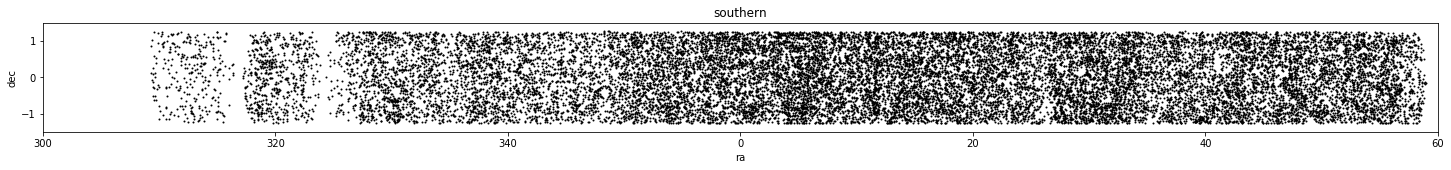

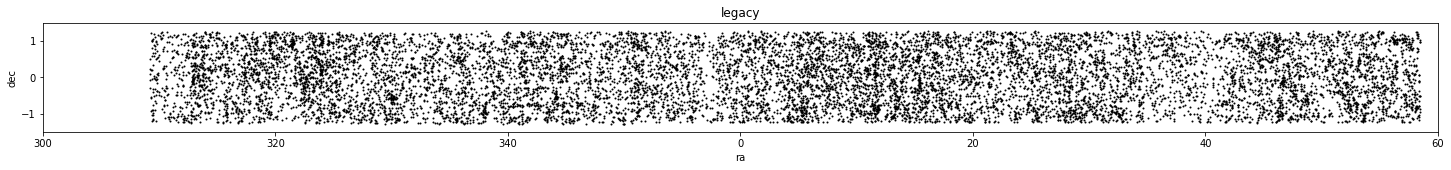

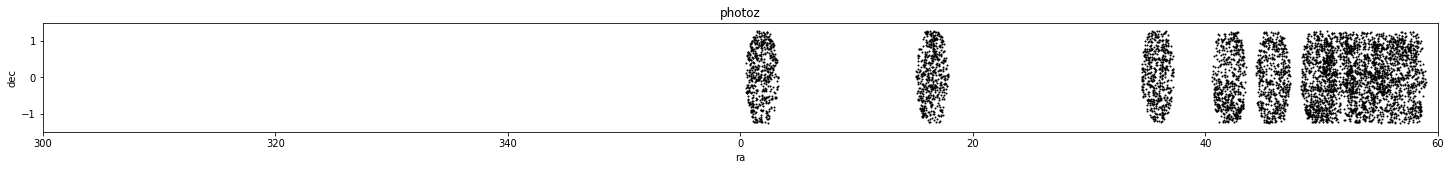

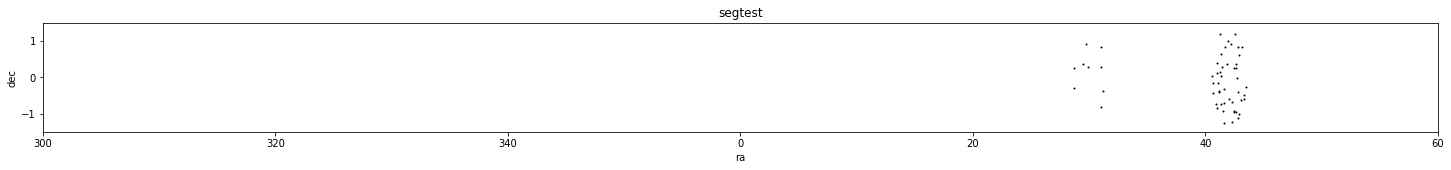

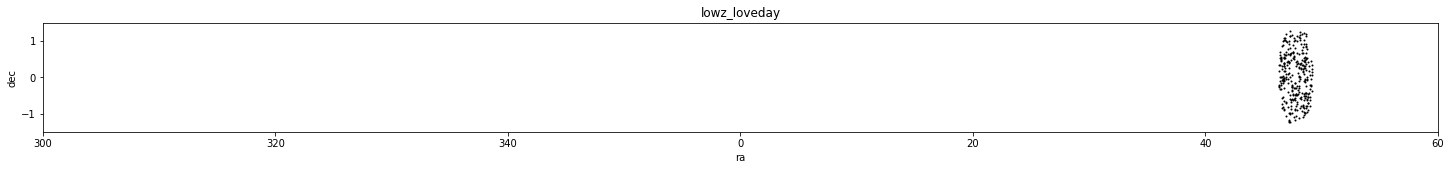

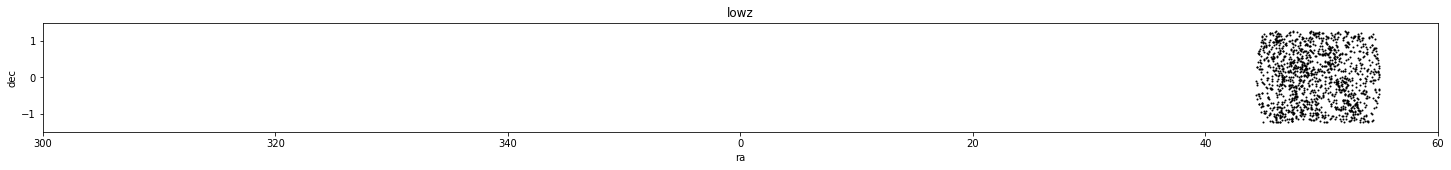

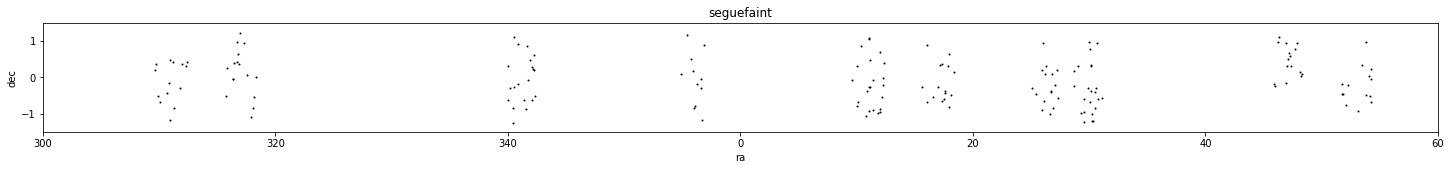

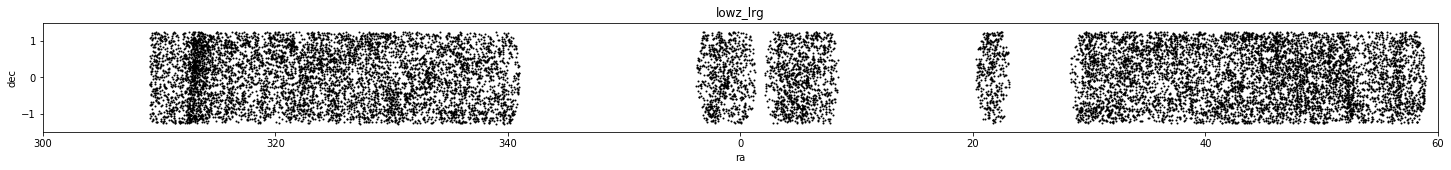

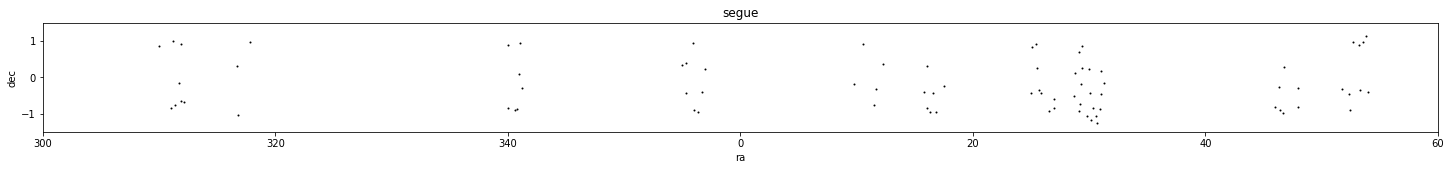

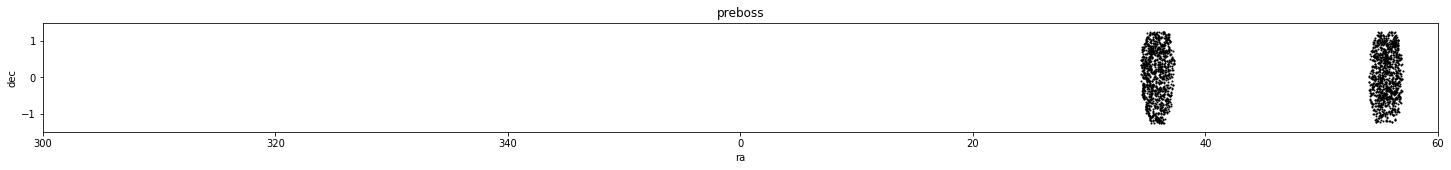

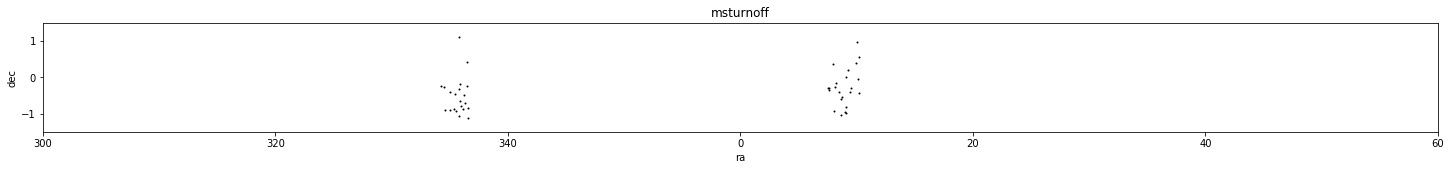

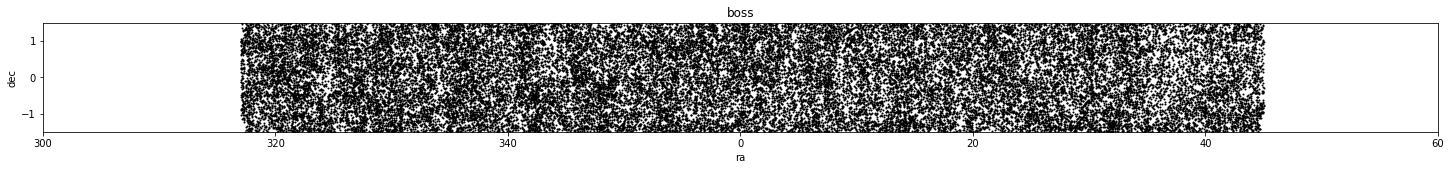

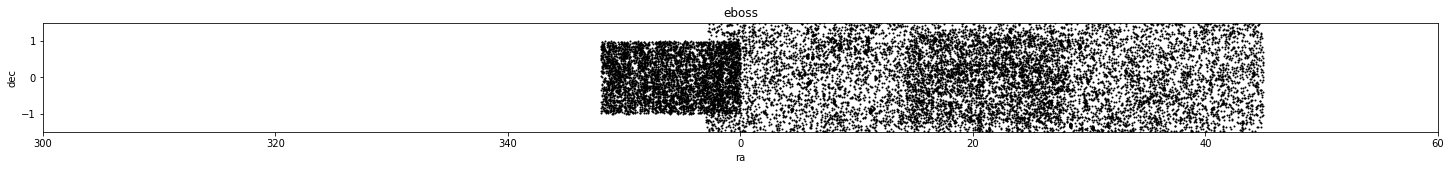

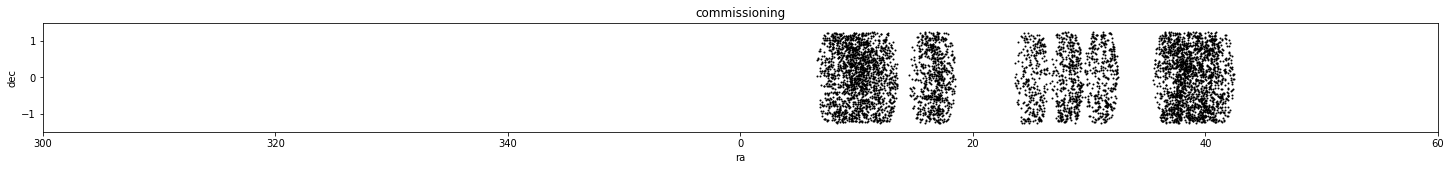

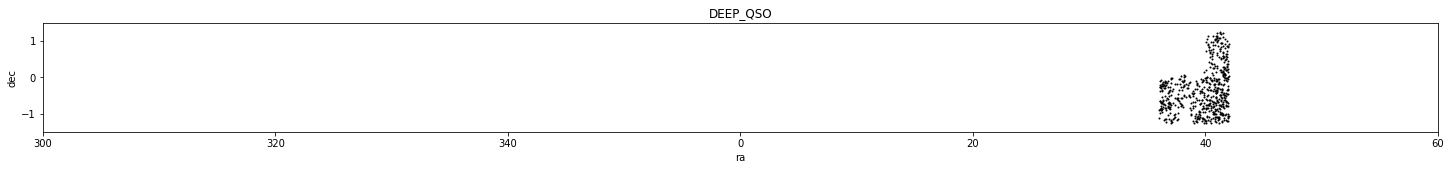

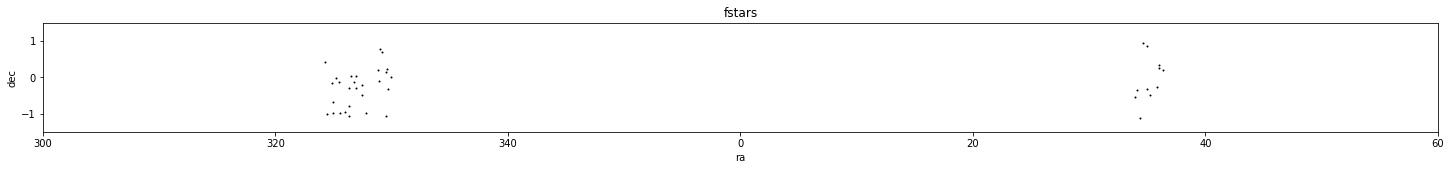

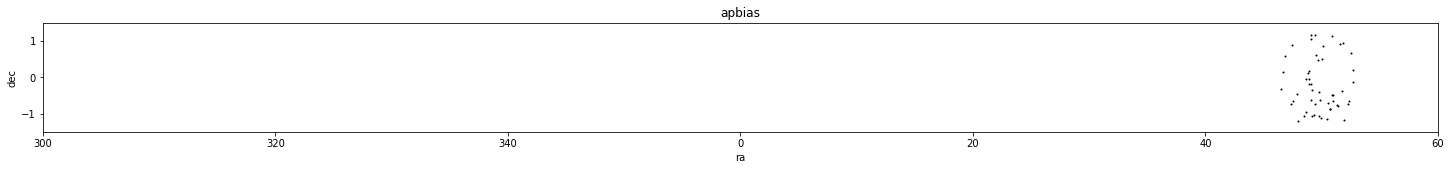

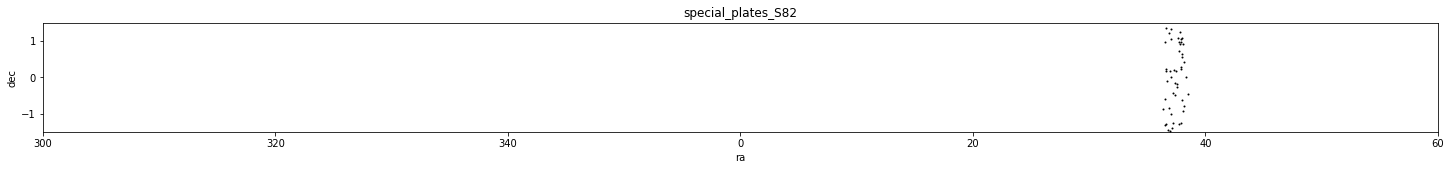

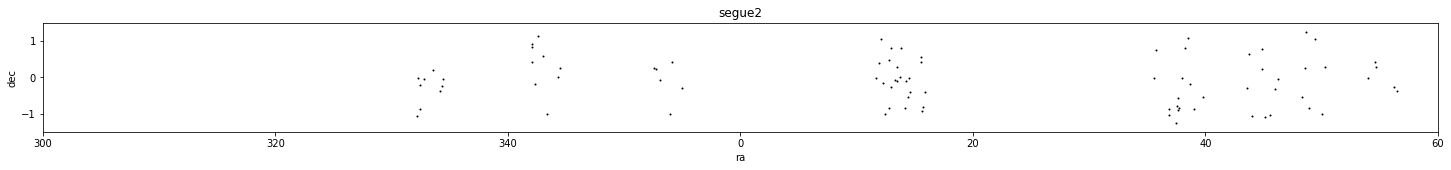

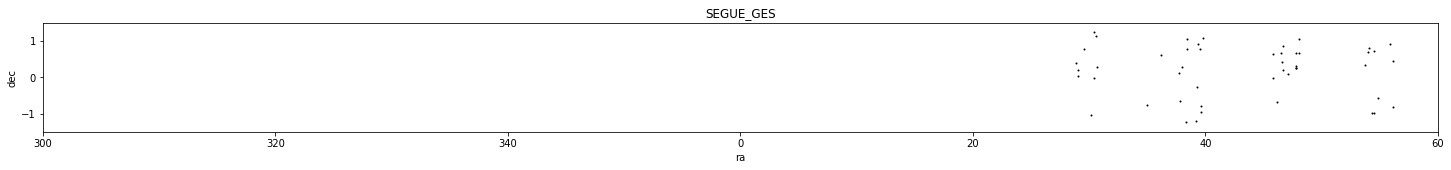

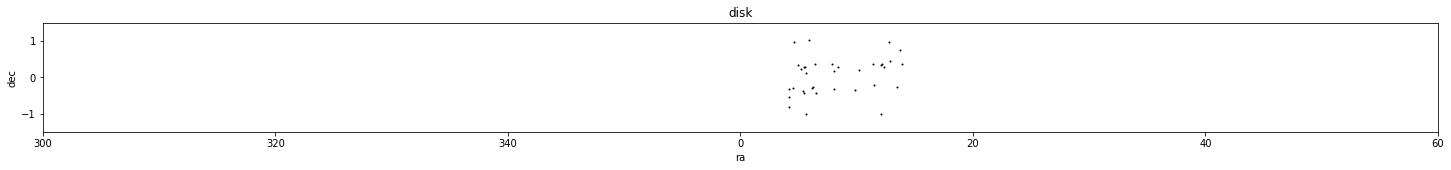

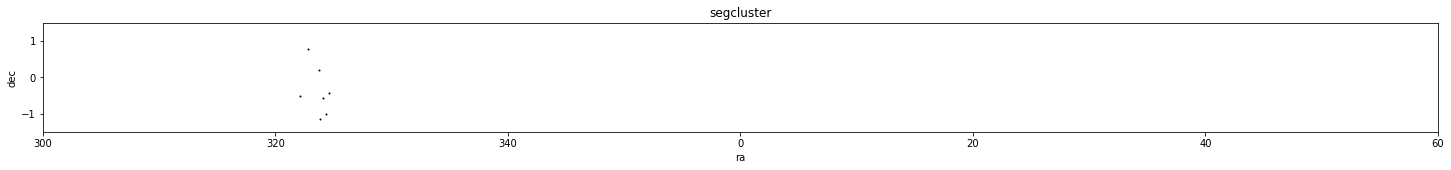

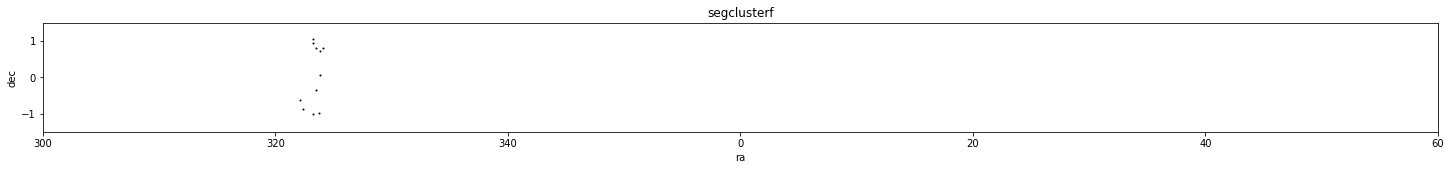

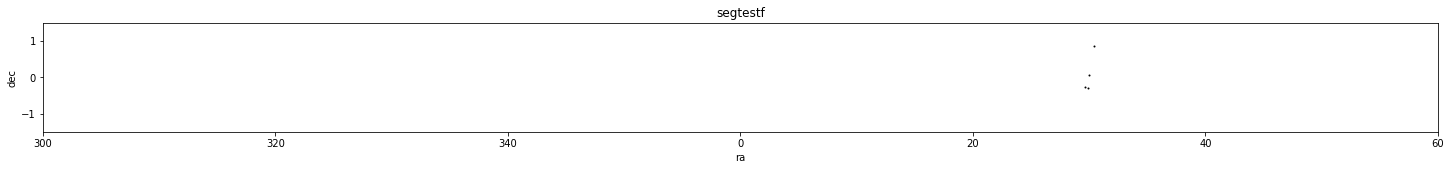

In [4]:
programs=[]
for s in SDSS['programname']:
    count=0
    for i in programs:
        if(i==s):
            count=1
            break
    if (count==0):
        programs.append(s)
print ('programs', len(programs), programs)

PROG=[]
for i, prog in enumerate(programs):
    PROG.append(SDSS[SDSS['programname']==programs[i]])
    gra = PROG[i]['ra']
    gdec = PROG[i]['dec']
    gra[gra > 180] -= 360
    fig, ax = plt.subplots(figsize=(25,2))
    ax.scatter(gra,gdec,1.,color='k',alpha=1)
    ax.axis([-60,60,-1.5,1.5])
    ticks = ax.get_xticks()
    ticks[ticks < 0] += 360
    ax.set_xticklabels([int(tick) for tick in ticks])
    ax.set_xlabel('ra')
    ax.set_ylabel('dec')
    ax.set_title(programs[i])

surveys 5 ['sdss', 'segue1', 'boss', 'eboss', 'segue2']


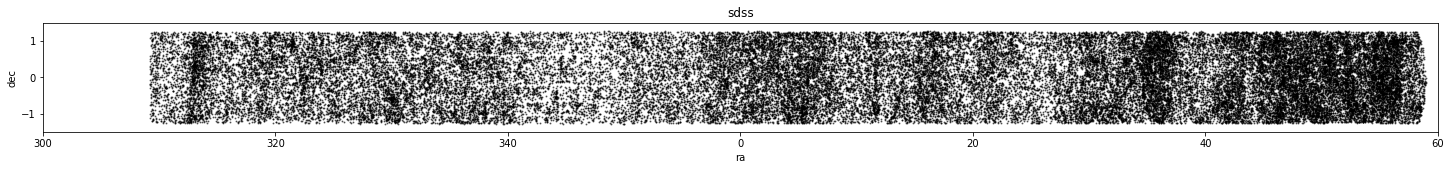

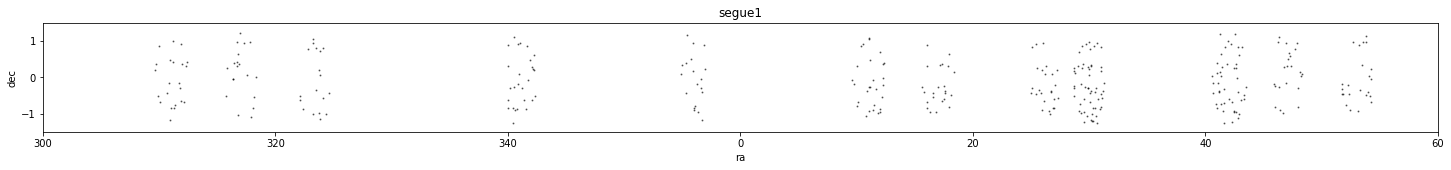

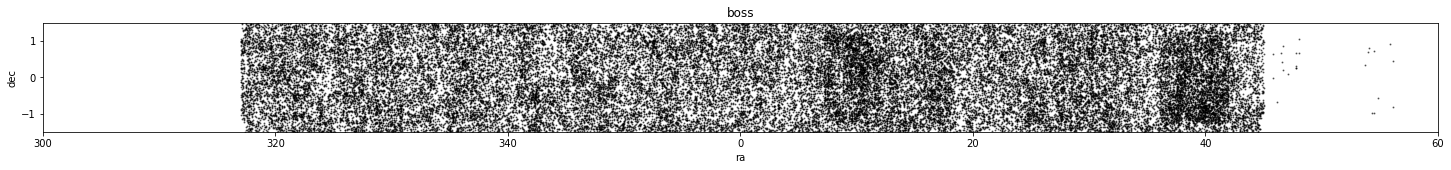

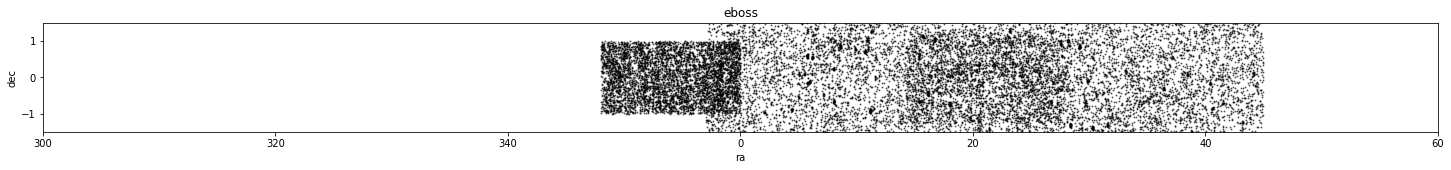

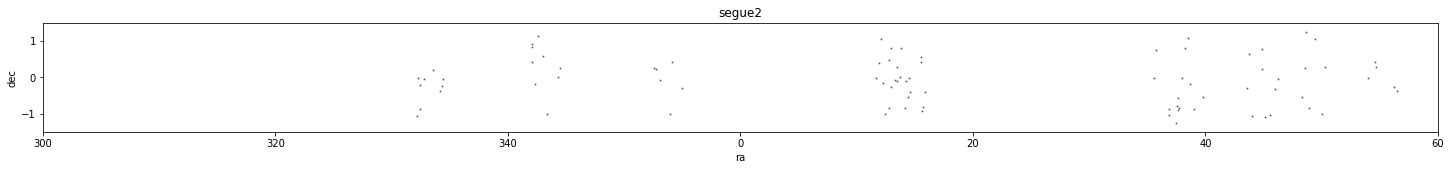

In [5]:
surveys=[]
for s in SDSS['survey']:
    count=0
    for i in surveys:
        if(i==s):
            count=1
            break
    if (count==0):
        surveys.append(s)
print ('surveys', len(surveys), surveys)

SURV=[]
for i, surv in enumerate(surveys):
    SURV.append(SDSS[SDSS['survey']==surveys[i]])
    gra = SURV[i]['ra']
    gdec = SURV[i]['dec']
    gra[gra > 180] -= 360
    fig, ax = plt.subplots(figsize=(25,2))
    ax.scatter(gra,gdec,1.,color='k',alpha=.5)
    ax.axis([-60,60,-1.5,1.5])
    ticks = ax.get_xticks()
    ticks[ticks < 0] += 360
    ax.set_xticklabels([int(tick) for tick in ticks])
    ax.set_xlabel('ra')
    ax.set_ylabel('dec')
    ax.set_title(surveys[i])

In [6]:
temp=SDSS[SDSS['ra']>180]
for t in temp:
    t['ra']-=360
SDSS[SDSS['ra']>180]=temp

a=len(SDSS[(SDSS['programname']=='legacy')])
print('legacy', a)
b=len(SDSS[(SDSS['programname']=='boss')])
print('boss', b)
c=len(SDSS[(SDSS['programname']=='eboss')])
print('eboss', c)
print('total',a+b+c)

legacy 12697
boss 37184
eboss 16489
total 66370


Text(0.5,1,'totalb')

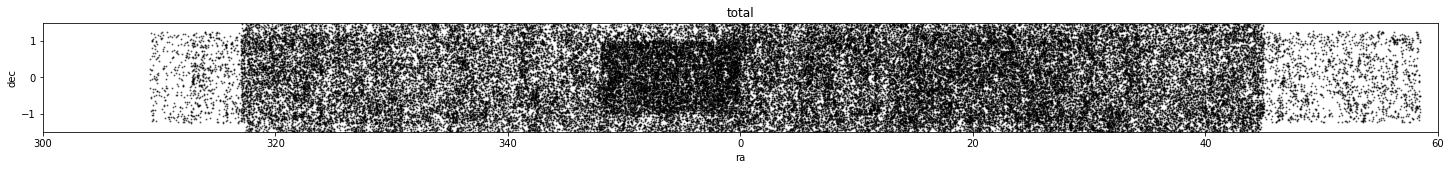

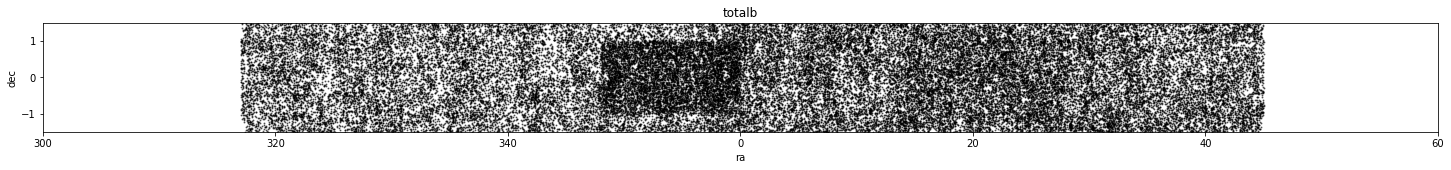

In [7]:
from astropy.table import vstack

legacy=SDSS[(SDSS['programname']=='legacy')]
boss=SDSS[(SDSS['programname']=='boss')]
ebossALL=SDSS[(SDSS['programname']=='eboss')]
Total=vstack([legacy, boss, ebossALL])
Totalb=vstack([boss, ebossALL])

gra = Total['ra']
gdec = Total['dec']
gra[gra > 180] -= 360
fig, ax = plt.subplots(figsize=(25,2))
ax.scatter(gra,gdec,1.,color='k',alpha=.5)
ax.axis([-60,60,-1.5,1.5])
ticks = ax.get_xticks()
ticks[ticks < 0] += 360
ax.set_xticklabels([int(tick) for tick in ticks])
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_title('total')

gra = Totalb['ra']
gdec = Totalb['dec']
gra[gra > 180] -= 360
fig, ax = plt.subplots(figsize=(25,2))
ax.scatter(gra,gdec,1.,color='k',alpha=.5)
ax.axis([-60,60,-1.5,1.5])
ticks = ax.get_xticks()
ticks[ticks < 0] += 360
ax.set_xticklabels([int(tick) for tick in ticks])
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_title('totalb')

In [8]:
Total.write('ProgTotal.fits', overwrite=True)
Totalb.write('ProgTotalb.fits', overwrite=True)

In [9]:
import numpy as np
patches= np.empty(7, dtype=object)
patches[0]=ebossALL[(ebossALL['ra']<=-3)]
patches[1]=ebossALL[((ebossALL['ra']>-3)&(ebossALL['ra']<=0)&(ebossALL['dec']>-1)&(ebossALL['dec']<=1))]
patches[2]=ebossALL[(((ebossALL['ra']>0)&(ebossALL['ra']<=14))|((((ebossALL['ra']>=-3)&(ebossALL['ra']<=0)))&((ebossALL['dec']>1)|(ebossALL['dec']<-1))))]
patches[3]=ebossALL[((ebossALL['ra']>14)&(ebossALL['ra']<=28))]
patches[4]=ebossALL[(ebossALL['ra']>28)]
patches[5]=boss
patches[6]=legacy


3818
1648
2883
4803
3337
37184
12697


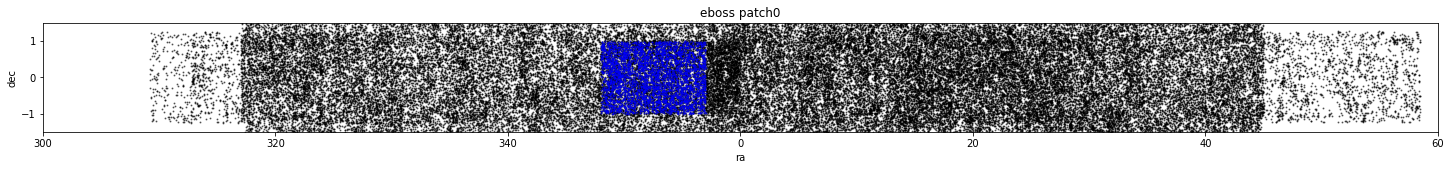

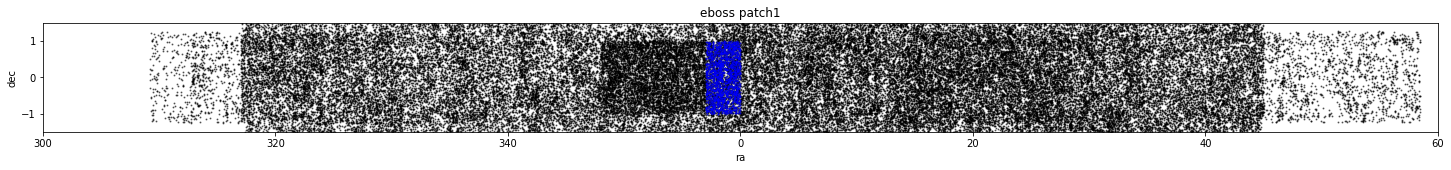

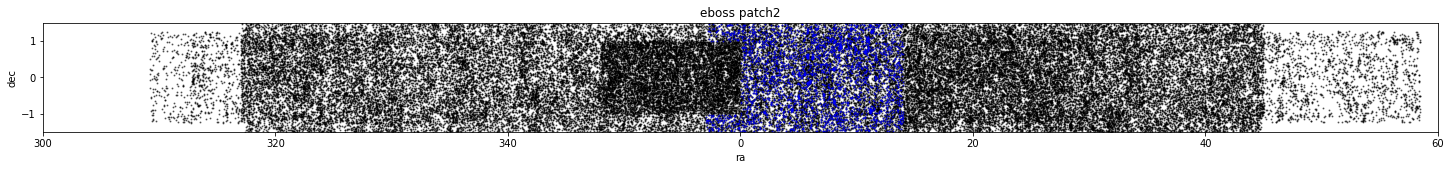

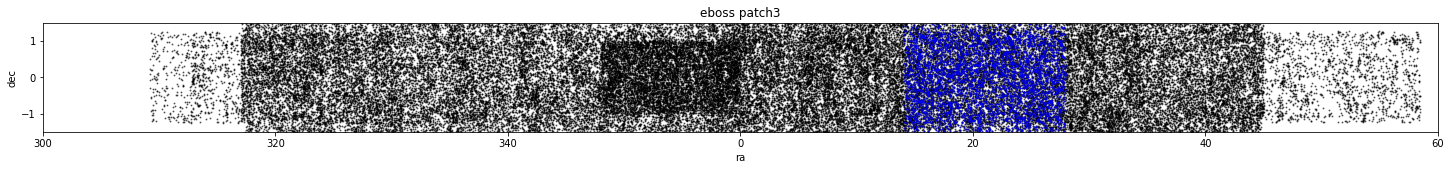

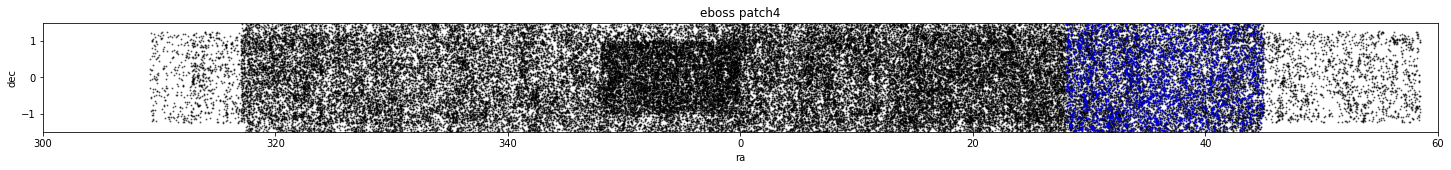

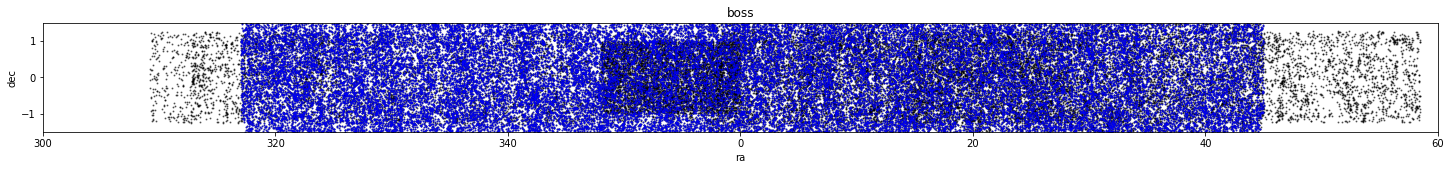

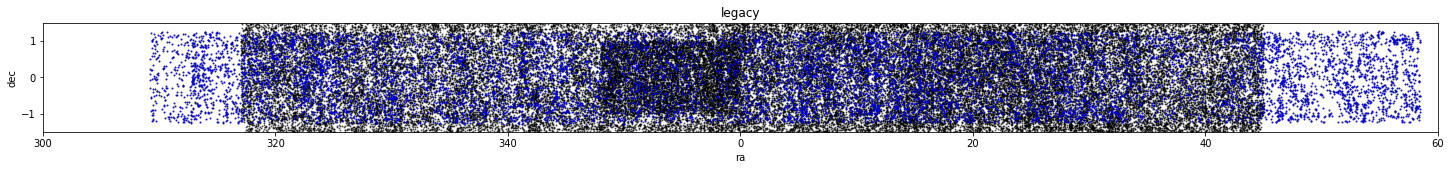

In [10]:
for i in range(7):
    print(len(patches[i]))
    gra = Total['ra']
    pra = patches[i]['ra']
    gdec = Total['dec']
    pdec = patches[i]['dec']
    gra[gra > 180] -= 360
    pra[pra > 180] -= 360
    fig, ax = plt.subplots(figsize=(25,2))
    ax.scatter(gra,gdec,1.,color='k',alpha=.5)
    ax.axis([-60,60,-1.5,1.5])
    ax.scatter(pra,pdec,1.,color='b',alpha=.5)
    ticks = ax.get_xticks()
    ticks[ticks < 0] += 360
    ax.set_xticklabels([int(tick) for tick in ticks])
    ax.set_xlabel('ra')
    ax.set_ylabel('dec')
    if i==6:
        ax.set_title('legacy')
    elif i==5:
        ax.set_title('boss')
    else:
        ax.set_title('eboss patch'+str(i))

In [11]:
# #Shows 2dhist to verity roughly uniform distribution in patches
# for i, patch in enumerate(patches):
#     fig, h2 = plt.subplots(figsize=(10,5))
#     q=h2.hist2d(patch['ra'], patch['dec'],bins=20)
#     h2.set_xlabel('ra')
#     h2.set_ylabel('dec')
#     h2.set_title('patch'+str(i))
#     plt.colorbar(q[3], ax=h2)

In [12]:
colora=['b','g','r','k','c','m','orange']

In [13]:
# #Plots patches and colors
# ra=[]
# # Plot the data
# fig, sep = plt.subplots(figsize=(25,2))
# for i, patch in enumerate(patches):
#     ra.append(patch['ra'])
#     ra[i][ra[i] > 180] -= 360
#     sep.scatter(ra[i],patch['dec'],1.,color=colora[i],alpha=.5)
# # Set the ticks so that negative ticks represent >180 numbers
# ticks = ax.get_xticks()
# ticks[ticks < 0] += 360
# sep.set_xticklabels([int(tick) for tick in ticks])
# sep.set_xlabel('ra')
# sep.set_ylabel('dec')
# fig.savefig('patchRaDec.pdf')

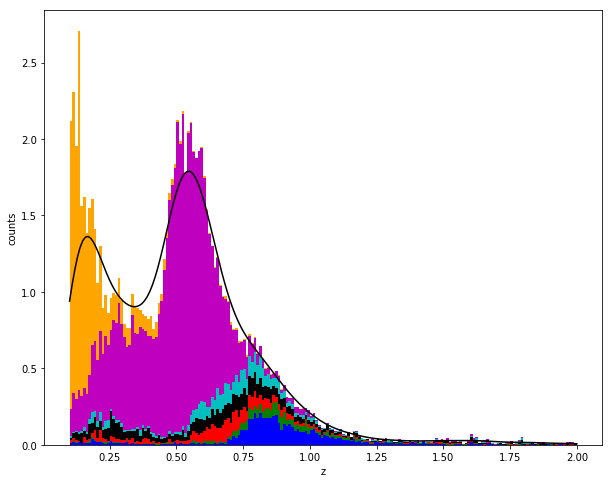

In [14]:
import numpy as np
from scipy import stats
b=np.arange(0.1,2.01,0.01)
zdist=[]
for p in patches:
    zdist.append(p['z'])
fig, zt = plt.subplots(figsize=(10,8))
zt.hist(zdist,bins=b,color=colora,stacked=True,density=True)
zt.set_xlabel('z')
zt.set_ylabel('counts')

kernel = stats.gaussian_kde(Total['z'], bw_method=0.2)
evaluated=kernel.evaluate(b)
zt.plot(b,evaluated, color='k')

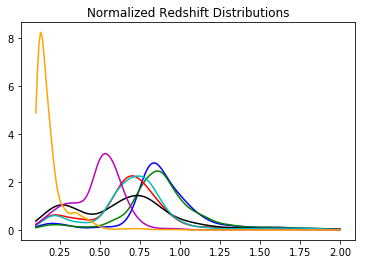

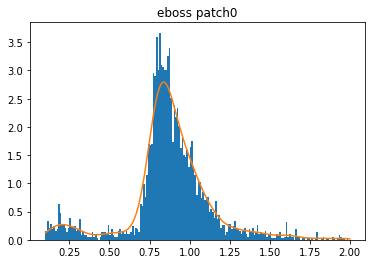

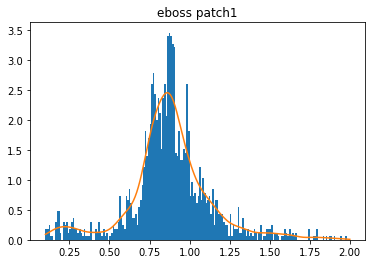

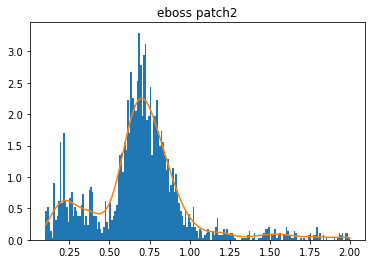

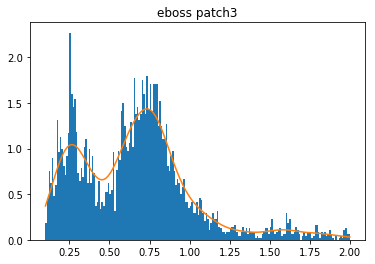

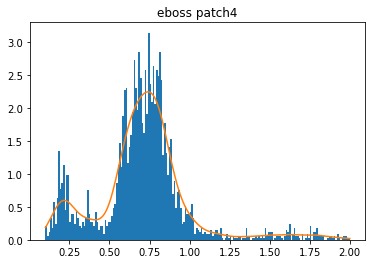

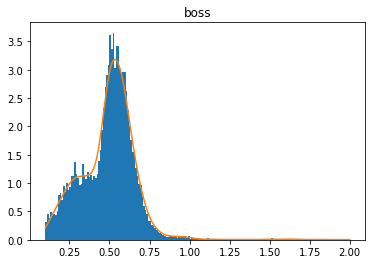

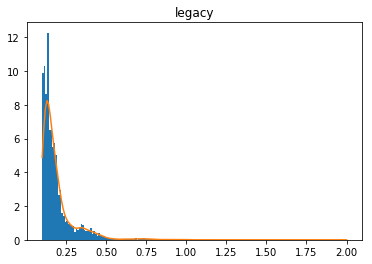

In [15]:
import scipy
from scipy import stats
import math

evalu=[]
fig1, al = plt.subplots()
al.set_title('Normalized Redshift Distributions')
for i, p in enumerate(patches):
    kernel = stats.gaussian_kde(p['z'], bw_method=0.2)
    fig2, sm = plt.subplots()
    sm.hist(p['z'],bins=b,density=True)
    evaluated=kernel.evaluate(b)
    evalu.append(evaluated)
    sm.plot(b,evaluated)
    al.plot(b,evaluated, color=colora[i])
    if i==6:
        sm.set_title('legacy')
    elif i==5:
        sm.set_title('boss')
    else:
        sm.set_title('eboss patch'+str(i))
#fig1.savefig('PatchNormZdist.pdf')

In [16]:
dmm=[]
rmm=[]
print('i\tDmin\t\tDmax\t\tRmin\t\t\tRmax')
for i, p in enumerate(patches):
    if (i==6):
        print(i, '\t', p['dec'].min(), '\t', p['dec'].max(), '\t', p['ra'].min(), '\t\t', p['ra'].max())
    else:
        print(i, '\t', p['dec'].min(), '\t', p['dec'].max(), '\t', p['ra'].min(), '\t', p['ra'].max())
    dmm.append([p['dec'].min(),p['dec'].max()])
    rmm.append([p['ra'].min(),p['ra'].max()])

i	Dmin		Dmax		Rmin			Rmax
0 	 -0.99938838 	 0.99985208 	 -11.999450000000024 	 -3.001500000000078
1 	 -0.99924956 	 0.99851367 	 -2.999500000000012 	 -0.006779999999935171
2 	 -1.4987505 	 1.4998014 	 -2.9701900000000023 	 13.997609000000011
3 	 -1.4987823 	 1.4996119 	 14.011376999999982 	 27.994069000000025
4 	 -1.4949339 	 1.4976405 	 28.00216899999998 	 44.97780999999998
5 	 -1.499881 	 1.4998407 	 -42.999090000000024 	 44.99801200000002
6 	 -1.2819772 	 1.2732654 	 -50.79746 		 58.448046


In [17]:
area=np.empty(7, dtype=float)
for i in range(7):
    if (i==2):
        area[2]=((rmm[2][1]-rmm[2][0])*(dmm[2][1]-dmm[2][0]))-((rmm[1][1]-rmm[2][0])*(dmm[1][1]-dmm[1][0]))
    else:
        area[i]=((rmm[i][1]-rmm[i][0])*(dmm[i][1]-dmm[i][0]))

In [18]:
import math
ddensity=np.empty(8, dtype=float)
temp=np.empty(8, dtype=float)
pop=np.empty(8, dtype=int)
s82area=120*3
print ('patch\tgal\tpop\tddens\tblockpop')
for i, p in enumerate(patches): 
    ddensity[i]=20*len(p)/area[i]
    pop[i]=20*len(p)
    print (i, '\t', len(p),'\t',pop[i],'\t', int(round(ddensity[i])),end='')
    if i==2:
        rp2=pop[2]
        pop[2]=int(math.ceil(ddensity[2]*((rmm[2][1]-rmm[2][0])*(dmm[2][1]-dmm[2][0]))))
        print ('\t',pop[2],end='')
    print ()

patch	gal	pop	ddens	blockpop
0 	 3818 	 76360 	 4245
1 	 1648 	 32960 	 5513
2 	 2883 	 57660 	 1283	 65253
3 	 4803 	 96060 	 2291
4 	 3337 	 66740 	 1314
5 	 37184 	 743680 	 2817
6 	 12697 	 253940 	 910


In [19]:
from numpy import random as rand

def CDF(x):
    return np.cumsum(x)/np.cumsum(x)[-1]

random=[]
for i, p in enumerate(patches):
    r=[]
    d=[]
    z=[]
    q=CDF(evalu[i])
    inv=scipy.interpolate.interp1d(CDF(evalu[i]), b)
    for j in range (pop[i]):
        r.append(rand.uniform(rmm[i][0],rmm[i][1]))
        d.append(rand.uniform(dmm[i][0],dmm[i][1]))
        a=rand.uniform(q.min(),q.max())
        z.append(inv(a))
    temp=Table([r, d, z], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
    if i==2:
        print ('in\texpect\t\tout')
        print (len(temp),'\t',end='')
        temp=temp[(((temp['ra']>0)&(temp['ra']<=14))|((((temp['ra']>=-3)&(temp['ra']<=0)))&((temp['dec']>1)|(temp['dec']<-1))))]
        print (rp2,':\t',len(temp))
        print ()
    temp[temp['ra']<0]['ra']+=360
    random.append(temp)

in	expect		out
65253 	57660 :	 57723



In [20]:
from astropy.table import vstack
total=Table([[],[],[]], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
totalb=Table([[],[],[]], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
for i, r in enumerate(random):
    total=vstack([total,r])
    print(i,end=' ')
    if (i!=6):
        print('b',end='')
        totalb=vstack([totalb,r])
    print()
random.append(total)
random.append(totalb)

0 b
1 b
2 b
3 b
4 b
5 b
6 


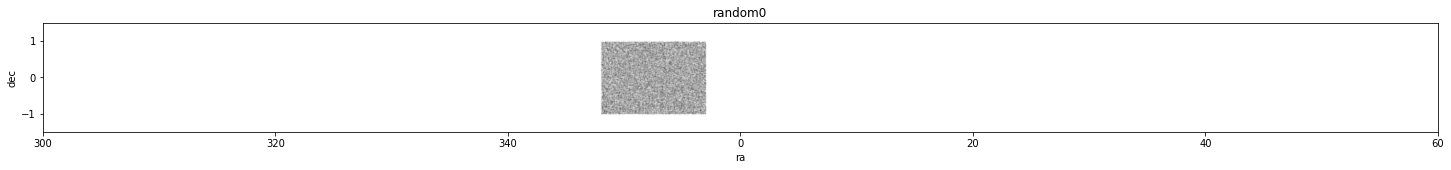

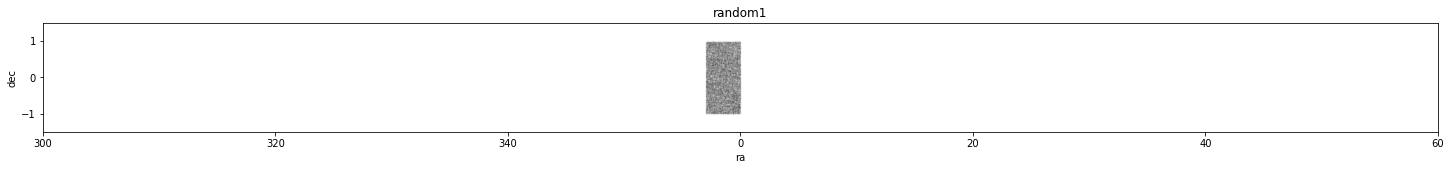

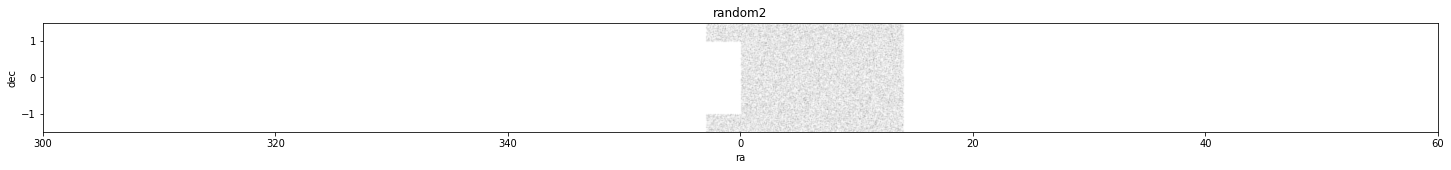

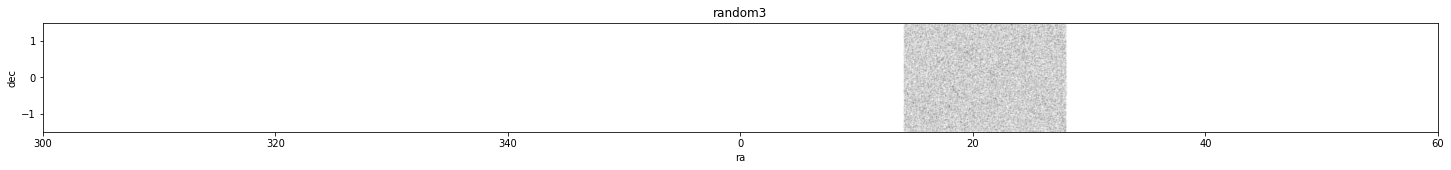

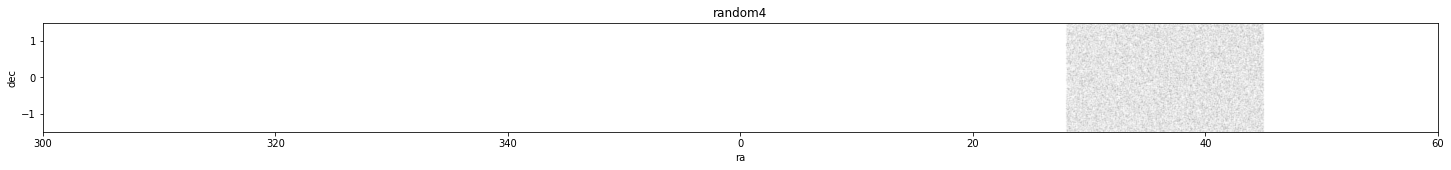

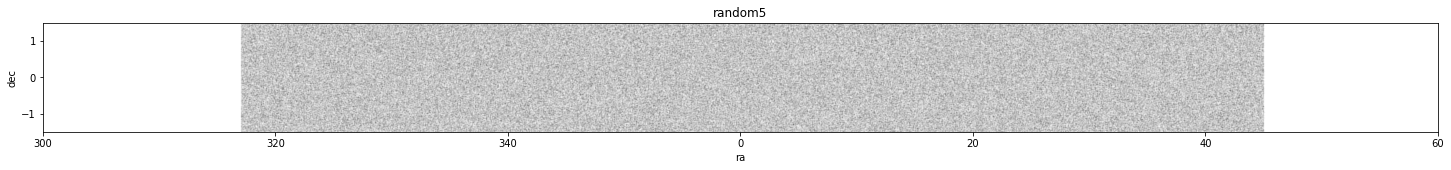

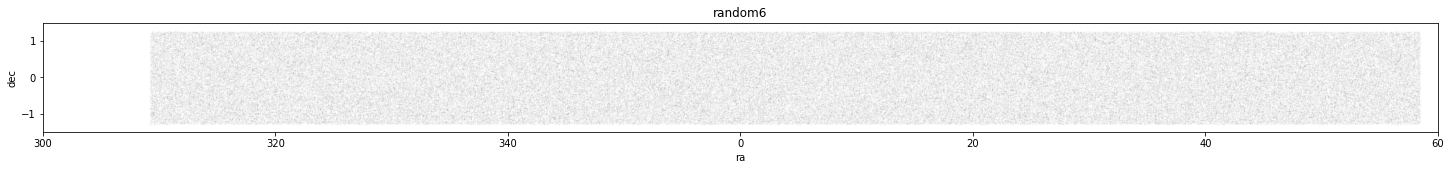

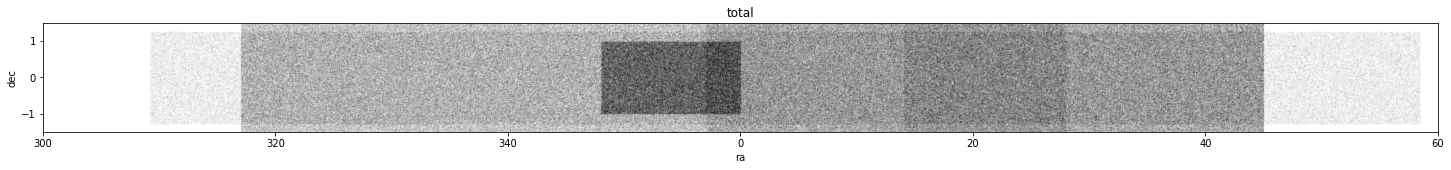

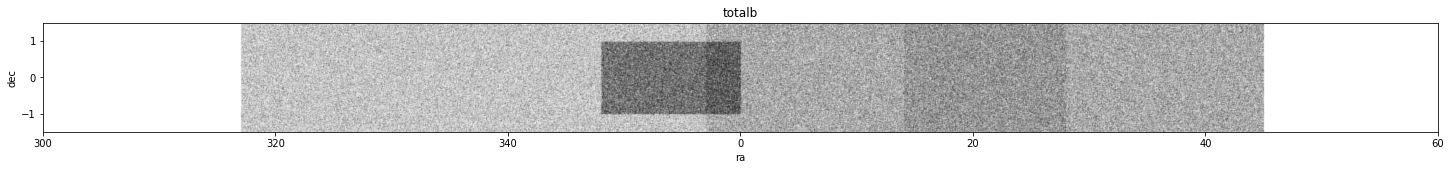

In [21]:
for i, patch in enumerate(random):
    pra = patch['ra']
    pdec = patch['dec']
    pra[pra > 180] -= 360
    fig, ax = plt.subplots(figsize=(25,2))
    ax.scatter(pra,pdec,1,color='k',alpha=.01)
    ax.axis([-60,60,-1.5,1.5])
    ticks = ax.get_xticks()
    ticks[ticks < 0] += 360
    ax.set_xticklabels([int(tick) for tick in ticks])
    ax.set_xlabel('ra')
    ax.set_ylabel('dec')
    if (i==7):
        ax.set_title('total')
    elif (i==8):
        ax.set_title('totalb')
    else:
        ax.set_title('random'+str(i))

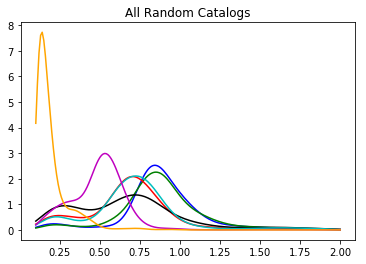

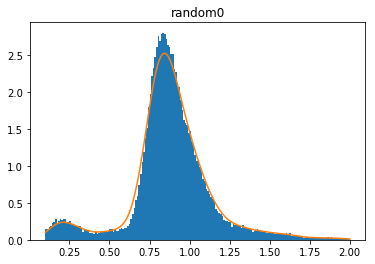

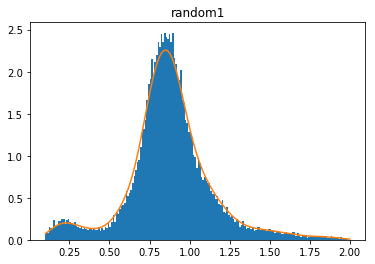

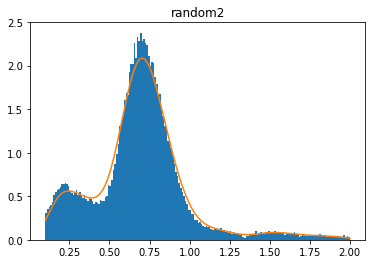

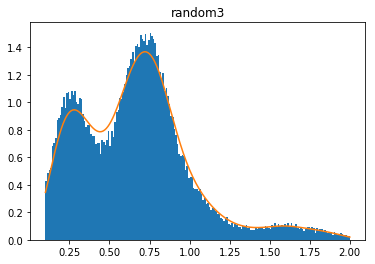

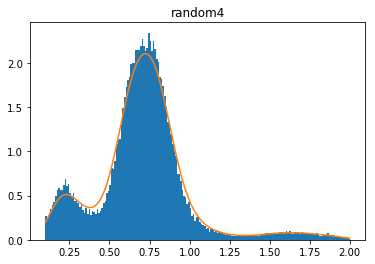

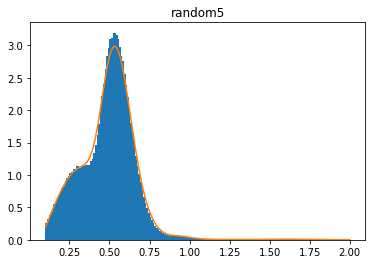

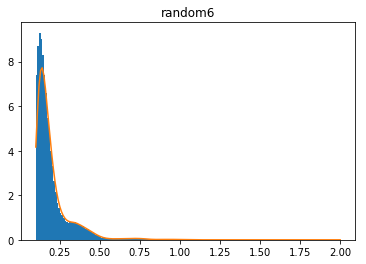

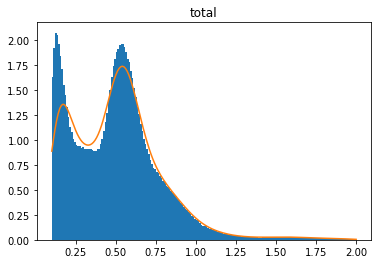

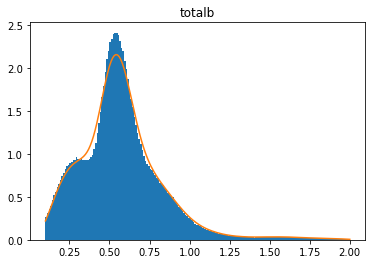

In [22]:
fig1, al = plt.subplots()
al.set_title('All Random Catalogs')
for i, ran in enumerate(random):
    kernel = stats.gaussian_kde(ran['z'], bw_method=0.2)
    fig2, sm = plt.subplots()
    sm.hist(ran['z'],bins=b,density=True)
    evaluated=kernel.evaluate(b)
    sm.plot(b,evaluated)
    if (i==7):
        sm.set_title('total')
    elif (i==8):
        sm.set_title('totalb')
    else:
        al.plot(b,evaluated, color=colora[i])
        sm.set_title('random'+str(i))
#fig1.savefig('PatchNormZdist.pdf')

In [23]:
random[7].write('lowzPrograndom.fits', format='fits', overwrite=True)
random[8].write('lowzPrograndomb.fits', format='fits', overwrite=True)

In [24]:
r=[]
d=[]
z=[]
kernel = stats.gaussian_kde(SDSS['z'], bw_method=0.2)
evaluated=kernel.evaluate(b)
q=CDF(evaluated)
inv=scipy.interpolate.interp1d(q, b)
for j in range (len(SDSS)):
    rinp=rand.randint(0,len(SDSS)-1)
    r.append(SDSS['ra'][rinp])
    d.append(SDSS['dec'][rinp])
    a=rand.uniform(q.min(),q.max())
    z.append(inv(a))   
random2=Table([r, d, z], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
random2[random2['ra']<0]['ra']+=360

Text(0.5,1,'random2')

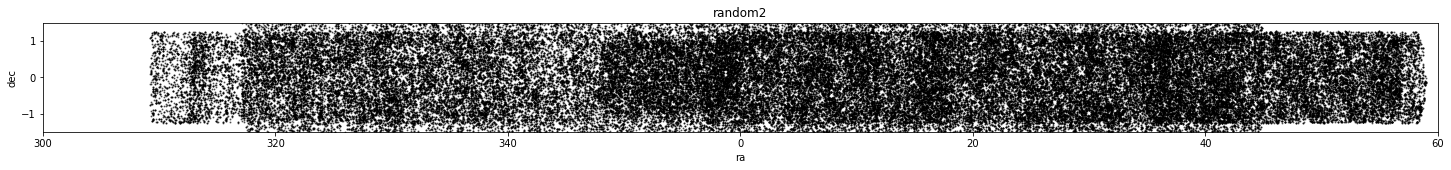

In [25]:
pra = random2['ra']
pdec = random2['dec']
pra[pra > 180] -= 360
fig, ax = plt.subplots(figsize=(25,2))
ax.scatter(pra,pdec,1,color='k',alpha=.5)
ax.axis([-60,60,-1.5,1.5])
ticks = ax.get_xticks()
ticks[ticks < 0] += 360
ax.set_xticklabels([int(tick) for tick in ticks])
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_title('random2')

Text(0.5,1,'random2')

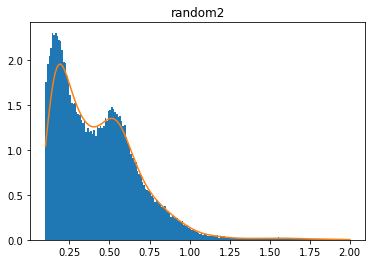

In [26]:
kernel = stats.gaussian_kde(random2['z'], bw_method=0.2)
fig2, sm = plt.subplots()
sm.hist(random2['z'],bins=b,density=True)
evaluated=kernel.evaluate(b)
sm.plot(b,evaluated)
sm.set_title('random2')
#fig1.savefig('PatchNormZdist.pdf')

In [27]:
random2.write('lowzrandom2.fits', format='fits', overwrite=True)
oldpatchesrandom=Table.read('/Users/justin/Astro/Yale18/RandomCatalog/lowzrandom.fits')

In [28]:
print(len(SDSS['z']), len(Total['z']), len(Totalb['z']))

119365 66370 53673


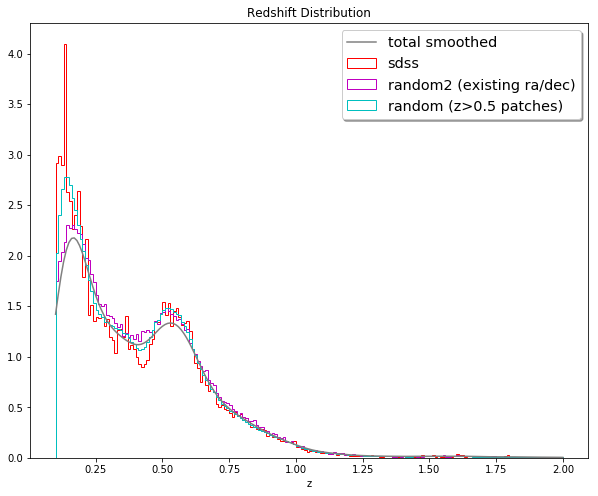

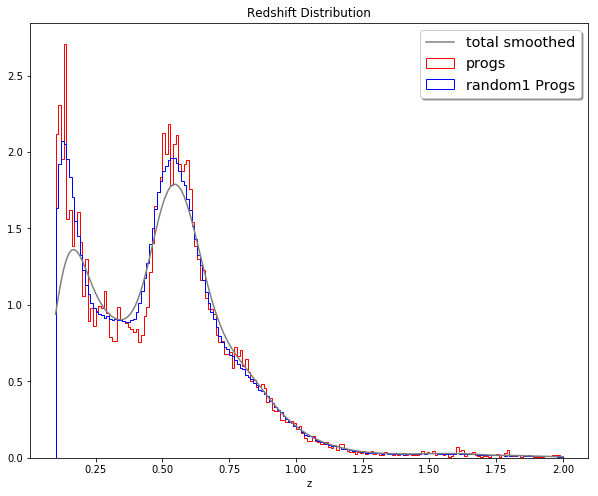

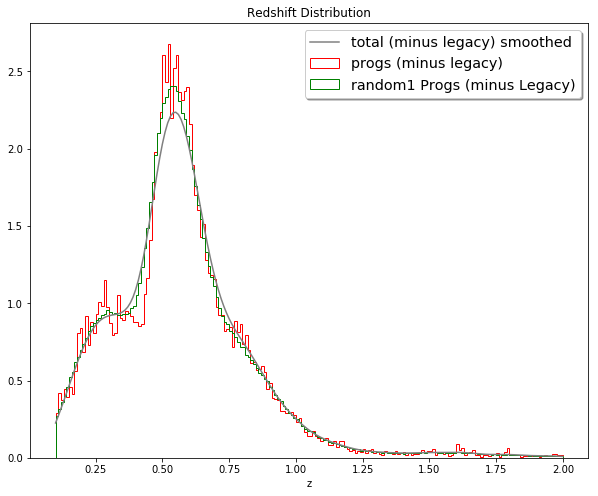

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
fig2, bx = plt.subplots(figsize=(10,8))
fig3, cx = plt.subplots(figsize=(10,8))

ax.hist(SDSS['z'],bins=b,density=True, histtype='step', color='r', label='sdss')
ax.hist(random2['z'],bins=b,density=True, histtype='step', color='m', label='random2 (existing ra/dec)')
ax.hist(oldpatchesrandom['z'],bins=b,density=True, histtype='step', color='c', label='random (z>0.5 patches)')

bx.hist(Total['z'],bins=b,density=True, histtype='step', color='r', label='progs')
bx.hist(random[7]['z'],bins=b,density=True, histtype='step', color='b', label='random1 Progs')

cx.hist(Totalb['z'],bins=b,density=True, histtype='step', color='r', label='progs (minus legacy)')
cx.hist(random[8]['z'],bins=b,density=True, histtype='step', color='g', label='random1 Progs (minus Legacy)')

kernel = stats.gaussian_kde(SDSS['z'], bw_method=0.2)
evaluated=kernel.evaluate(b)
ax.plot(b,evaluated, color='gray', label='total smoothed')

kernel = stats.gaussian_kde(Total['z'], bw_method=0.2)
evaluated=kernel.evaluate(b)
bx.plot(b,evaluated, color='gray', label='total smoothed')

kernel = stats.gaussian_kde(Totalb['z'], bw_method=0.2)
evaluated=kernel.evaluate(b)
cx.plot(b,evaluated, color='gray', label='total (minus legacy) smoothed')

ax.set_xlabel('z')
ax.set_title('Redshift Distribution')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

bx.set_xlabel('z')
bx.set_title('Redshift Distribution')
legend = bx.legend(loc='upper right', shadow=True, fontsize='x-large')

cx.set_xlabel('z')
cx.set_title('Redshift Distribution')
legend = cx.legend(loc='upper right', shadow=True, fontsize='x-large')
#fig.savefig('ProgRandomNormZdist.pdf')

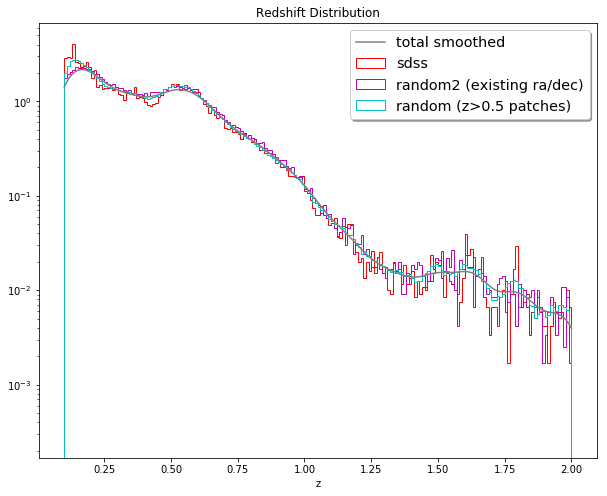

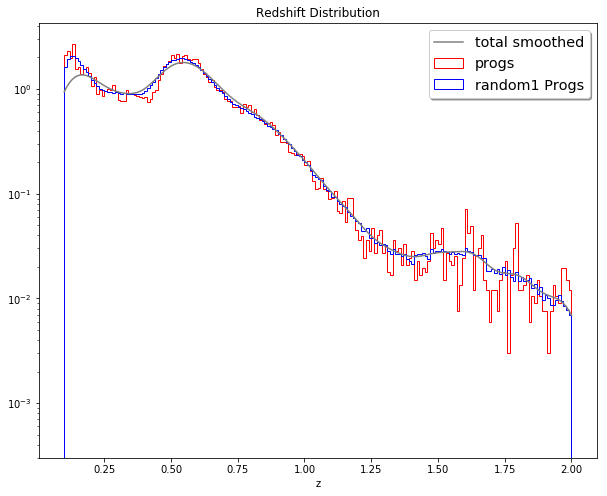

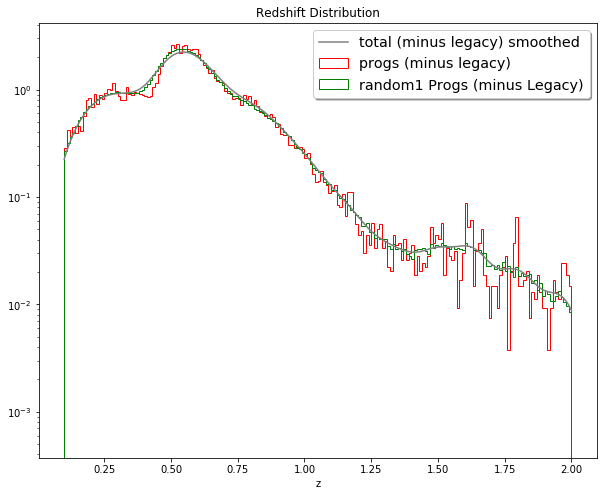

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
fig2, bx = plt.subplots(figsize=(10,8))
fig3, cx = plt.subplots(figsize=(10,8))

ax.hist(SDSS['z'],bins=b,density=True, histtype='step', color='r', label='sdss', log=True)
ax.hist(random2['z'],bins=b,density=True, histtype='step', color='m', label='random2 (existing ra/dec)')
ax.hist(oldpatchesrandom['z'],bins=b,density=True, histtype='step', color='c', label='random (z>0.5 patches)')

bx.hist(Total['z'],bins=b,density=True, histtype='step', color='r', label='progs', log=True)
bx.hist(random[7]['z'],bins=b,density=True, histtype='step', color='b', label='random1 Progs')

cx.hist(Totalb['z'],bins=b,density=True, histtype='step', color='r', label='progs (minus legacy)', log=True)
cx.hist(random[8]['z'],bins=b,density=True, histtype='step', color='g', label='random1 Progs (minus Legacy)')

kernel = stats.gaussian_kde(SDSS['z'], bw_method=0.2)
evaluated=kernel.evaluate(b)
ax.plot(b,evaluated, color='gray', label='total smoothed')

kernel = stats.gaussian_kde(Total['z'], bw_method=0.2)
evaluated=kernel.evaluate(b)
bx.plot(b,evaluated, color='gray', label='total smoothed')

kernel = stats.gaussian_kde(Totalb['z'], bw_method=0.2)
evaluated=kernel.evaluate(b)
cx.plot(b,evaluated, color='gray', label='total (minus legacy) smoothed')

ax.set_xlabel('z')
ax.set_title('Redshift Distribution')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

bx.set_xlabel('z')
bx.set_title('Redshift Distribution')
legend = bx.legend(loc='upper right', shadow=True, fontsize='x-large')

cx.set_xlabel('z')
cx.set_title('Redshift Distribution')
legend = cx.legend(loc='upper right', shadow=True, fontsize='x-large')
#fig.savefig('ProgRandomNormZdist.pdf')

In [31]:
notify("Notebook Complete","Surveys Random Catalog")